<a href="https://colab.research.google.com/github/javajerry/Algorithm-Trading/blob/main/LTSM_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artifical recurrent neural network called Long Short Term Memory(LSTM) 
#              to predict the closing stock proce of a corporation(applie Inc.) using the past 60 days stock price.


In [2]:
#import the library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quoote
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2020-12-24')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.065252
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.849854
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.380503
2013-01-07,18.903572,18.400000,18.642857,18.710714,484156400.0,16.284145
2013-01-08,18.996071,18.616072,18.900356,18.761072,458707200.0,16.327978
...,...,...,...,...,...,...
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005


In [4]:
# Get the number of rows and columns in the data set
df.shape

(2011, 6)

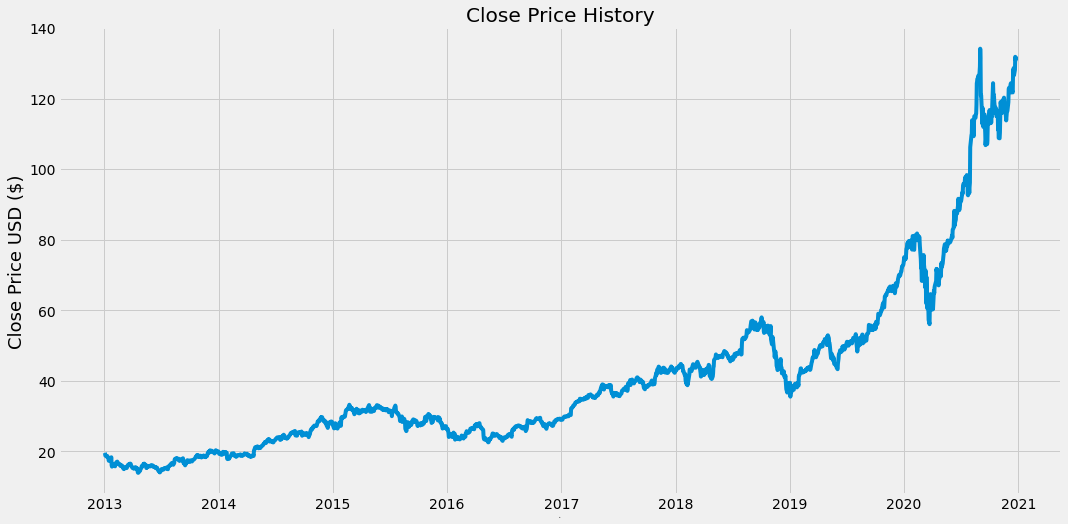

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=1)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [6]:
#Create a new daataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1609

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.9808705 ],
       [0.97321867],
       [0.98161902]])

In [10]:
#Create the trainng data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.04708139, 0.04502289, 0.04053753, 0.0396167 , 0.04003553,
       0.0375968 , 0.03950084, 0.03854735, 0.03303719, 0.02833499,
       0.03432634, 0.03331344, 0.03251736, 0.03393425, 0.03667894,
       0.01781369, 0.0146591 , 0.01761468, 0.02012172, 0.01969399,
       0.01929595, 0.01874047, 0.01538388, 0.019994  , 0.01984845,
       0.02307731, 0.02508533, 0.0265557 , 0.02298226, 0.02271789,
       0.02259313, 0.02068314, 0.02063265, 0.01732358, 0.01649483,
       0.01790578, 0.01552646, 0.01735923, 0.01605223, 0.01511061,
       0.01186392, 0.00876872, 0.01206293, 0.01043514, 0.01189659,
       0.01223522, 0.01406204, 0.01125795, 0.01123418, 0.01246691,
       0.01578192, 0.01936427, 0.0189989 , 0.01828302, 0.0184761 ,
       0.02120297, 0.02169903, 0.02097424, 0.01828302, 0.01548488])]
[0.011400530420072968]



In [12]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape the data
print('before', x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('after', x_train.shape)


before (1549, 60)
after (1549, 60, 1)


In [19]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [21]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1549/1549 [==============================] - 38s 23ms/step - loss: 0.0012


In [24]:
#Create the testing data set
#Create a new array containing scaled values from index 1549 to 2009
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

  if i<=60:
    print(x_test)
    print()


[array([0.2440272 , 0.24781155, 0.24964135, 0.24897595, 0.24687587,
       0.24267566, 0.24352819, 0.2559832 , 0.26016262, 0.26182607,
       0.26602625, 0.27099578, 0.27494648, 0.27184831, 0.27523758,
       0.28964715, 0.28124677, 0.27644358, 0.27238891, 0.27588216,
       0.27640199, 0.27895953, 0.28164185, 0.28742231, 0.29018779,
       0.29089475, 0.29361863, 0.30006449, 0.29881689, 0.3011457 ,
       0.29767327, 0.29750692, 0.29825547, 0.29829707, 0.30636478,
       0.30788266, 0.30927579, 0.31540974, 0.31474437, 0.31083527,
       0.30879756, 0.30944214, 0.30124968, 0.32173084, 0.31888217,
       0.32428838, 0.31748904, 0.30580336, 0.30588652, 0.30135365,
       0.29399289, 0.27016407, 0.27627724, 0.28097645, 0.27922984,
       0.27698419, 0.26469549, 0.27199387, 0.26405091, 0.25756349])]



In [25]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [26]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
#Get the models predicted values
predictions = model.predict(x_test)
#scale back
predictions = scaler.inverse_transform(predictions)

In [30]:
# Get Root Mean Square Error (RMSE)
# RMSE is a good measure of how accurate the model predicts the response and
# it's the standard deviation of the residuals and the lower values usually 
# indicates the better fit. Usually you want to evaluate your model with other 
# metrics

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.91401278557469

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


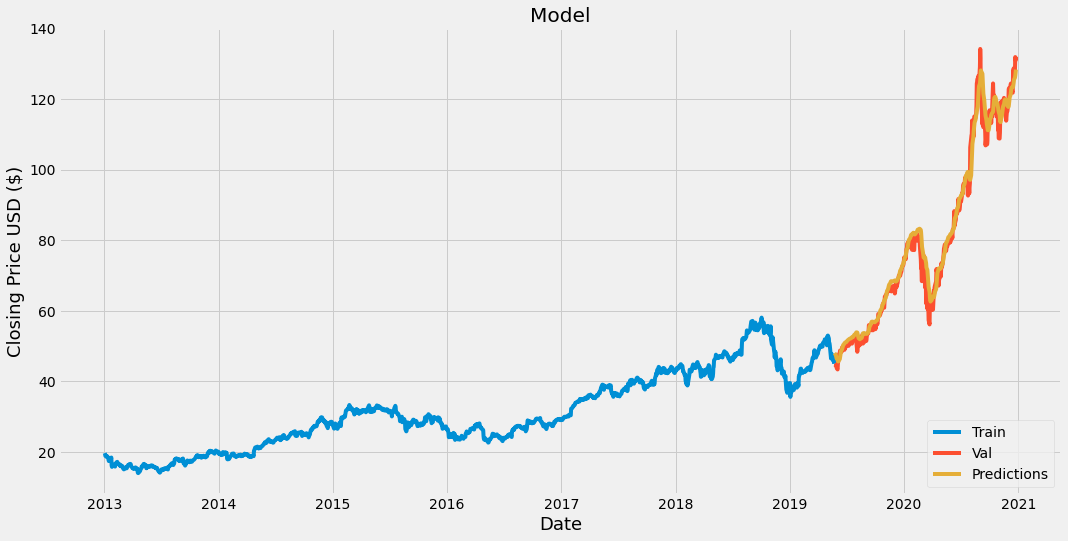

In [33]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

#Note
# blue values on which model was trained
# red is the actual values (closing price) for the rest of these days
# yellow is the values predicted by the model

In [34]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-05-24,44.742500,47.950989
2019-05-28,44.557499,47.507690
2019-05-29,44.345001,47.089939
2019-05-30,44.575001,46.704842
2019-05-31,43.767502,46.398380
...,...,...
2020-12-18,126.660004,125.475388
2020-12-21,128.229996,126.049515
2020-12-22,131.880005,126.621712


In [38]:
# Try to predict the value
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2020-12-23')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data betwen 0 an 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to be 3D shape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[128.32867]]


In [39]:
#Get the Quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-24', end='2020-12-24')
print(apple_quote2['Close'])

Date
2020-12-24    131.970001
2020-12-24    131.970001
Name: Close, dtype: float64
